In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

data_path = "data/abalone.csv"
read_data = pd.read_csv(data_path)
read_data.head(5)


,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


--------------------KNN---------------------
거리기반 학습 정확도 : 100.0
거리기반 테스트 정확도 : 53.34928229665071


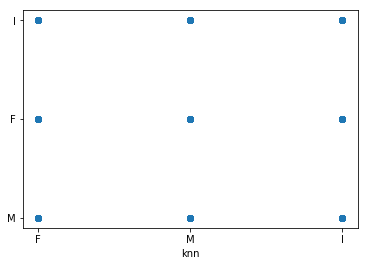

In [139]:
#-- Set Data.
np_read_data = np.array(read_data)
data_x = np_read_data[:,1:9]
data_y = np_read_data[:,0]

trn_x, tst_x, trn_y, tst_y = train_test_split(data_x[:,1:9], data_y, test_size=0.3)

#-- traing set & test set
mod_knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights = 'distance')
mod_knn.fit(X=trn_x,y=trn_y)
knn_pred_trn = mod_knn.predict(X=trn_x)
knn_pred_tst = mod_knn.predict(X=tst_x)

#-- visualization for KNN
plt.scatter(x=tst_y, y=knn_pred_tst)
plt.xlabel("knn")

print("--------------------KNN---------------------")
print("거리기반 학습 정확도 :",(metrics.accuracy_score(trn_y, knn_pred_trn)*100))
print("거리기반 테스트 정확도 :",(metrics.accuracy_score(tst_y, knn_pred_tst)*100))
knn=metrics.accuracy_score(tst_y, knn_pred_tst)*100
#---------------------------------------------------


--------------------DT---------------------
학습 정확도 : 63.462196373588775
테스트 정확도 : 53.74800637958532


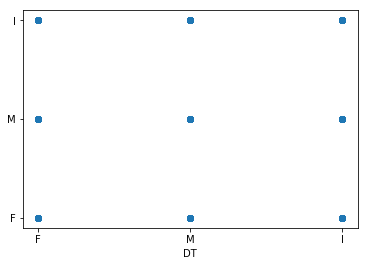

In [140]:

#--DT training set & test set
mod_trr = tree.DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 50, min_samples_split=3)

mod_trr.fit(X=trn_x,y=trn_y)

tree_pred_trn = mod_trr.predict(X=trn_x)
tree_pred_tst = mod_trr.predict(X=tst_x)
plt.scatter(x=tst_y, y=tree_pred_tst)
plt.xlabel("DT")

print("--------------------DT---------------------")
print("학습 정확도 :",(metrics.accuracy_score(trn_y, tree_pred_trn)*100))
print("테스트 정확도 :",(metrics.accuracy_score(tst_y, tree_pred_tst)*100))
dt=metrics.accuracy_score(tst_y, tree_pred_tst)*100

#-----------------------------------------



D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


--------------------NN---------------------
학습 정확도 : 55.86725966472802
테스트 정확도 : 56.14035087719298


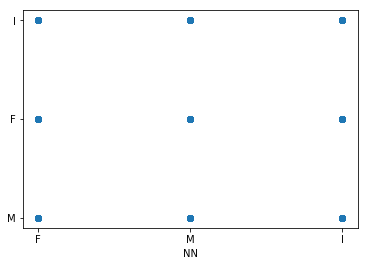

In [141]:
#-- NN set
scaler=StandardScaler()
scaler.fit(trn_x)
trn_x_scale = scaler.transform(trn_x)
tst_x_scale = scaler.transform(tst_x)

#--NN training set & test set
mod_nn = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)
mod_nn.fit(X=trn_x_scale, y=trn_y)

nn_pred_trn = mod_nn.predict(X=trn_x_scale)
nn_pred_tst = mod_nn.predict(X=tst_x_scale)

plt.scatter(x=tst_y, y=nn_pred_tst)
plt.xlabel("NN")

print("--------------------NN---------------------")
print("학습 정확도 :",accuracy_score(trn_y, nn_pred_trn)*100)
print("테스트 정확도 :",(accuracy_score(tst_y, nn_pred_tst)*100))
nn=(accuracy_score(tst_y, nn_pred_tst)*100)

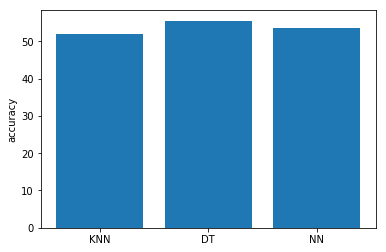

In [135]:
#-- performance visualization

cls = ('KNN','DT','NN')
y_value = np.arange(len(cls))
performance = [knn,dt,nn]

plt.bar(y_value,performance,align='center')
plt.ylabel('accuracy')
plt.xticks(y_value,cls)
plt.show()

#-- DT visualization
mod_trr.feature_importances_
export_graphviz(mod_trr, out_file='trr.dot')